# D209 Data Mining 1: Performance Assessment - NVM4 Task 2 Predictive Analysis
## Edward Wu (Student ID 010870448)
### 12/23/2024
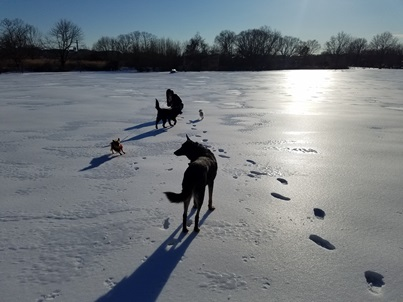

## Part 1 Research Question
### A1 Proposal of Question
&nbsp;&nbsp;&nbsp;&nbsp; For this performance assessment we will be attempting to answer the following question: "What affects the length of tenure for a customer within this company."  We will be working on the telecommunications data set provided by WGU's D208 website in the form of the file **churn_clean.csv**.  We will be attempting to use **random forest regression** on the **continuous variable 'Tenure'** which will act as the **dependent variable**.

### A2 Defined Goal
&nbsp;&nbsp;&nbsp;&nbsp; The goal of this research is to help stakeholders try to identify what variables can reliably predict how long a customer stays with the company using the random forest model.  We will be attempting to answer our research question by modeling with the following **independent variables**: 

>>
Quantitative variables: 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year'

>>
Qualitative variables: 'Churn', 'Techie', 'TechSupport', 'PaperlessBilling'

This research is relevant for stakeholders because identifying factors for length of tenure is valuable information that assists the company to design products or strategies to hedge churn by targeting specific segments of the market.  Customer retention is a well known issue within the telecommunications business and being able to identify this churning market segment is the first step in addressing retention issues.  Based on the findings of of this analysis, we will try to recommend a course of action to help the company increase length of tenure.

## Part 2 Method Justification
### B1 Explanation of Prediction
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In working with data there are two categories of data, qualitative and quantitative.  Quantitative data is data that is inherently numeric in nature and quantifies an observation, while qualitative data is data that is not numeric in nature and describes a characteristic or quality of an observation such as names or descriptions such as "small, medium, and large".  For this analysis, we will be working on the dependent variable **Tenure** which is quantitative, with response values being numeric and continuous in nature.  In order to attempt solving our research question regarding **Tenure**, we will be using the Random Forest method.  According to Kawerk (n.d.) of DataCamp, Random Forest is an ensemble method that uses a decision tree as a base estimator where each estimator is trained on a different bootstrap sample.  Dr. Elleh (n.d.) of WGU explains that decision trees are a machine learning algorithm that can handle both categorical and numerical data, requires less computation time and training time, are not sensitive to outliers, and are non-parametric.  He further explains that Random Forest is a model that aggregates many models together where the main model constructs multiple decision tree models, each tree makes its own individual prediction.  Because we are trying to answer a question regarding a quantitative variable, we will be using Random Forest Regressor, which will be constructing many different decision trees producing their own predictions, these predictions are then averaged by the main random forest model which produces an output showing the mean of the predictions of all the decision tree models.  The **expected outcome** of the analysis is a model that is able to reliably predict the length of tenure of a customer to help with business analysis based on the variables provided.

### B2 Summary of Method Assumption
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Kawerk (n.d.) posits that there are many benefits to using categorical and regression trees.  He states that in contrast to linear models, trees are able to capture non-linear relationships and trends between features and labels that linear models such as linear regression would not be able to capture.  In addition, he states that decision trees don't require the features to be on the same scale through standardization.  Dr. Elleh (n.d.) agrees, stating that one **assumption** of decision tree models are that they are non-parametric, thus they don't make distribution assumptions on the data and can deal with non-linear data, skewed data, multi-modal data, and categorical, ordinal, and non-ordinal data efficiently. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; While there are many benefits to decision tree models, Kawerk also explains that there are some limitations to the model.  He explains that tree models are also very sensitive to small variations in the training set, where when a single point is removed from the training set, a model's learned parameters may changed drastically.  The tree models also suffer from high variance when they are trained without constraints, in which case they may overfit the training set.  Because Random Forests Regression models are built on decision trees, they share all the benefits of the decision tree model while also having additional benefits of ensemble learning.  In Random Forests, the data is sampled and re-sampled many times using bootstrapping to create different tree models so many of the problems with variance and bias are eliminated.  Dr. Elleh (n.d.) agrees that Random Forest models helps improve the accuracy of the model and reduce overfitting when compared to single decision tree models.  He emphasizes though, that the **assumption** of the random forest model is similar to decision trees, that the sampling method (bootstrap method) is representative of the population as a whole, so the outcomes depend heavily on the training data set used.

### B3 Packages or Libraries List
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Python is a powerful programming language that offers easy to read syntax and is readily deployed in the real world setting as seen by its steady adoption by many businesses.  For large scale data analysis, both Python and R are the preferred choice of programs.  While Python may lack some of the out of the box functions that R has, what makes Python a better choice and such a versatile tool is the fact that Python is very flexible as a general purpose program and can install any number of packages from libraries containing all the tools that the analyst would need for the job.  If a tool is needed for reading and manipulating large sets of data, Python can use **numpy** and **pandas**.  If a visualization is needed, then we can call on **matplotlib** and **seaborn** to create beautiful graphs that express the data in an easy to understand format.  If a statistical package is needed for analysis, one can turn to **scipy**, and **sklearn** for their comprehensive statistical tools.  In particular, we will be using **scikit-learn** to import the packages necessary for preparing and wrangling the data using **train_test_split**, the model algorithm using **RandomForestRegressor**, and model performance metrics for measuring model performance and fine tuning model parameters using **mean_squared_error** and **r2_score**.  In addition to this, Dr. Elleh (n.d.) suggests using **GridSearchCV** method perform k-folds cross validation and hyper-parametric tuning of the model.  Dr. Elleh further suggests using **warnings** to disable Python built in warning messages for the purpose of showing clean output for this performance assessment.  Lastly, Dr. Elleh also recommends importing **platform** to show the Python version being used, which helps with reproducability and informs us to which packages are pre-loaded.

In [1]:
# Initialize Python by importing tools
import numpy as np
import pandas as pd

from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
from platform import python_version
print("The Python version used for this analysis is {}".format(python_version()))

The Python version used for this analysis is 3.9.18


## Part 3 Data Preparation
### C1 Data Pre-processing
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Even though we have decided to use Random Forest Regression as the model of choice for our analysis, we must first pre-process the data.  The goal of data pre-processing is to ensure that the model we are creating is not influenced by data quality issues, and to prepare and manipulate the data into a form that can be readily used by the model for analysis.  From WGU's D206 course we learned that the data preparation process can be broken down into three main goals: **data cleaning, data exploration, and data wrangling**.  These steps will be further expanded upon in the following section labeled **C3**.

### C2 Data Set Variables
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this section we will be identifying and classifying the variables that we will be selecting for further exploration.  As mentioned earlier, these variables are as follows:

>>
Independent **(quantitative)** variable : 'Tenure'

>>
Quantitative (numeric) variables: 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year'

>>
Qualitative (categorical) variables: 'Churn', 'Techie', 'TechSupport', 'PaperlessBilling'

These variables were arbitrarily chosen for this analysis using the theory that PII (personal identifying information) from customers such as 'Customer_id' and the customer's location may not be quite useful for our analysis.  Additionally, there may be survey bias in certain variables such as the ones labeled 'Item1', 'Item2', ..., 'Item8' which is why these variables were also removed.  In the next step **C3**, we will be creating a new variable called  **df_quant** which houses the **quantitative variables** we are working with, including our independent variable **Tenure**.  We will also be creating a new variable called  **df_qual** to house all the **qualitative variables**.


### C3 Steps for Analysis
As mentioned earlier, the data preparation process includes three main goals: **data cleaning, data exploration, and data wranggling**.  This section will be broken up into these three steps.

#### C3 Step 1 - Data Cleaning
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The process of data cleaning can be further broken down into three parts, the detection and treatment of: duplicates, missing values, and outliers.  We started off the process by importing all the tools and libraries needed for this assessment, which include: numpy, pandas, matplotlib, seaborn, statsmodels, sklearn, scipy, and warnings.  The specific packages used for data cleaning is **numpy** and **pandas**, with a few visualizations using **matplotlib** and **seaborn**.  Then we import the data from our **.csv** file and check to see if the data has been imported correctly and gaining an idea of how the data is structured by using the **.head()** method.  Once we verify that the dataframe is loaded properly, we go through the steps of identifying duplicates, missing values, and outliers.  Once these anomolies are found, we subsequently treat them depending on the type of anomoly found and in what situation we have.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Duplicates** refers to information which are duplicated across the entire row even though each row is supposed to represent different data points in the dataframe.  This causes a lot of problems during analysis and can cause heavy skewing.  For the treatment of duplicates we can either use **.drop_duplicates()** to completely drop the entire row of information, or we can impute the row with one of the statistical measures of central tendencies such as using the mean, median, or mode of each column if we wish to retain a data point.  In our case, since our dataframe contains 10,000 rows of data we may not wish to retain duplicated information since imputation runs its own risk of skewing information so we will drop all the duplicates if any are found.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The identification and treatment of **missing values** is a bit more nuanced simply due to the multitude of reasons why a missing value may be present in the data set.  Finding the missing value is simple, by using either the **.info()** or **.isna()** method.  Missing values may often times show up as **NaN** which means "not a number".  Determining how to treat missing values depends on the reasoning behind having a missing number.  If a value is missing because it was missing from the original data set, one could decide to treat similarly to the methods mentioned earlier for duplicates.  If we are working on a sufficiently large data set, we can drop the entire row of data.  If we find that our data set is lacking in sample size, we may also decide to impute values to the missing values using one of the measures of central tendencies such as mean, median, or mode.  There are many other reasons why missing values may be present which is why exploration into the data is necessary to further determine what steps will be needed to treat any missing values if there are any.

##### Loading dataframe from csv and initial cleaning procedures

In [3]:
# importing data by reading csv into a data frame
df = pd.read_csv('churn_clean.csv')

In [4]:
# Using .head() to verify the file loaded properly
print(df.head())

   CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     

##### Data Cleaning Steps to check for nulls and duplicates

In [5]:
# Detecting duplicates of each row
# using .duplicated() with .value_counts() to
# indicate how many are duplicated
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# To show understanding of the subject we can use .drop_duplicates()
# and repeat the duplicated().value_counts() to show no duplicates
# First create another df to manipulate and hold cleaned data
clean_df = df.copy(deep=True)

In [7]:
# REDUNDANT STEP
# Then we perform the method to drop duplicates and check for count
clean_df.drop_duplicates()
print(clean_df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [8]:
# Assessing data quality with .info() to see
# data types and non-null count
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [9]:
# Detecting missing values for each variable
# using the isna() to show null variables
# and using .sum() to add the results to show
# how many per column are missing
clean_df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The '.duplicated().value_counts()' method we employed came back with 10,000 false counts, meaning there are no duplicated rows within our data set.  Even so, we create a copy of the dataframe and rename it to **clean_df** to house cleaned data that we will later export into .csv file for submission.  We also run the **.drop_duplicates()** method to drop the (non-existant) duplicates and come back with another count of 10,000 false counts, meaning duplicates do not exist within this new **clean_df** dataframe.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; When we then run the **.info()** method, we find that every column is populated with 10,000 values except for **'InternetService'** which only contains 7,871 non-null values.  This means that there are **2,129 missing values** in this variable, a number we can confirm by running **.isna().sum()** which outputs the same number of missing values.  This missing information will need to be addressed in the following section.  First we must explore this variable to understand why the value is missing.  We thus run **.unique()** to find out what unique values are contained within the data.

In [10]:
print(clean_df['InternetService'].unique())

['Fiber Optic' 'DSL' nan]


In [11]:
# Printing .head(10) can let us take a peek at how these
# NaN values look within the pandas Dataframe
print(clean_df['InternetService'].head(10))

0    Fiber Optic
1    Fiber Optic
2            DSL
3            DSL
4    Fiber Optic
5            NaN
6            DSL
7            DSL
8            DSL
9    Fiber Optic
Name: InternetService, dtype: object


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Upon exploring the .csv file in Excel, we can see that there are three unique values that are supposed to be within the variable "InternetService": they are 'Fiber Optic', 'DSL', and 'None'.  From the results of running **.unique()**, we can conclude that 'None' was improperly read from the .csv and loaded into the dataframe as a 'NaN', which represents a missing value while the string 'None' is meant to represent a data point indicating that the customer did not sign up for internet service.  The fix for this is very simple as we can simply fill in all the missing values with the string 'None' which will conclude the treatment for missing values and duplicates.  We will be using the **.fillna()** method to replace all missing values with 'None'.  As a side note, if the missing value were from a variable with numeric values, we could impute the missing values by using the same **.fillna()** method and replacing the missing value with either the mean, median, or mode by using the **'.mean()', '.median()', or '.mode()'** methods.  An example of how this would look would be: *"df['Tenure'].fillna(df['Tenure'].mean(), inplace=True)"*.

In [12]:
# Replacing missing values within 'InternetService' variable
# by using .fillna() to replace NaN with "None"
clean_df['InternetService'].fillna('None', inplace=True)
# printing first 10 lines to see if missing value was replaced
print(clean_df['InternetService'].head(10))

0    Fiber Optic
1    Fiber Optic
2            DSL
3            DSL
4    Fiber Optic
5           None
6            DSL
7            DSL
8            DSL
9    Fiber Optic
Name: InternetService, dtype: object


In [13]:
# Run .unique() to confirm 'None' instead of NaN
print(clean_df['InternetService'].unique())

['Fiber Optic' 'DSL' 'None']


In [14]:
# Confirm clean_df no longer has missing values
clean_df.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

##### Finding Outliers

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The last step of data cleaning is the identification of **outliers**.  While not technically an outlier, a data quality issue was found during the search for outliers.  After careful consideration of the datatypes within this data set, we also find that all the data types of "object", "int64", and "float64" match the variables that they are supposed to represent aside from the variable "Zip", which represents the 5 digit zip code used by the United States.  The variable "Zip" is saved as an "int64" which is incorrect because zip codes are 5 digit numbers that represent an area, there is no inherent value to the numbers themselves.  If the variable is saved as an integer, it will also remove all the "0" numbers in such a way that a zip code of "00123" will show up in the data set as "123".  While this **data wrangling** can be tackled in another step, we correct it to ensure all data quality issues are resolved for the sake of having clean data in the **clean_df** dataframe we will be exporting later . According to stackoverflow (2015) the way to treat this is to first change the data type to "object" by using '.astype(str)' to change the integer to a string which better reflects the categorical discrete nature of zip codes.  Afterwards we use the 'str.zfill()' method to fill the front of the string with zeroes to reach 5 digits necessary for zip code formatting.

In [15]:
# print a .head() of 'Zip' to see the incorrect data in action
print(clean_df['Zip'].head(15))

0     99927
1     48661
2     97148
3     92014
4     77461
5     31030
6     37847
7     73109
8     34771
9     45237
10    18830
11      783
12    52739
13     4228
14    60162
Name: Zip, dtype: int64


In [16]:
# Seen above in line 11 and 13 that zip codes with less than 5 numbers exist
# .astype() with str.zfill() to correct 'Zip'
clean_df['Zip'] = clean_df['Zip'].astype(str).str.zfill(5)
# print the result to confirm the fix
print(clean_df['Zip'].head(15))

0     99927
1     48661
2     97148
3     92014
4     77461
5     31030
6     37847
7     73109
8     34771
9     45237
10    18830
11    00783
12    52739
13    04228
14    60162
Name: Zip, dtype: object


The results show that line 11 and 13 have been fixed to include the '0' in front and the "dtype" shows "object" as it should be.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Next we go through the steps to identify outliers.  In D206 one of the methods we learned about to identify outliers is the use of visualizations such as boxplots and histograms.  While these visualizations will be repeated in a later section, we will perform there here as part of the step to identify outliers.  We can also look at the descriptive statistics of the data to gain an understanding of the data using **.describe()**.  We will be creating a separate data frame variable called **df_quant** while removing variables that contain numeric values containing customer self-surveyed answers, demographic information, or other identifiers: such as 'CaseOrder', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', and 'Item8'.  The variables contained in **df_quant** will also be the **quantitative variables** we will later be using for modeling.

In [17]:
# Using .describe() to find variables with numeric values
# and .columns to pull list of column names
print(clean_df.describe().columns)

Index(['CaseOrder', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [18]:
# Separating the quantitative variables from demographic and survey-related variables and assigning to df_quant_outliers
df_quant = clean_df[['Population','Children','Age','Income','Outage_sec_perweek','Email',
                 'Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
# Use .describe() to provide initial statistical exploration 
print(df_quant.describe())

          Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.

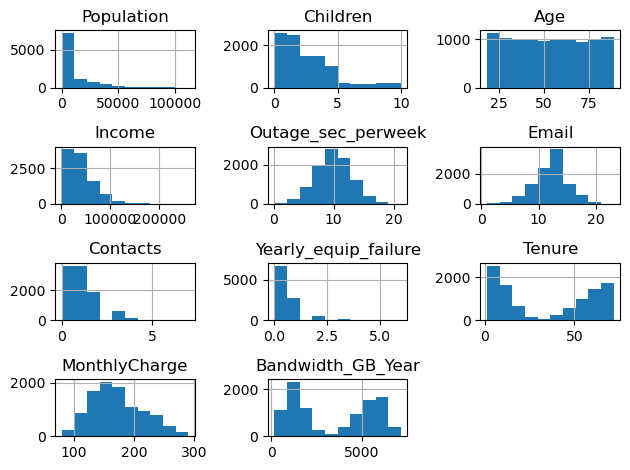

In [19]:
df_quant.hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='Income'>

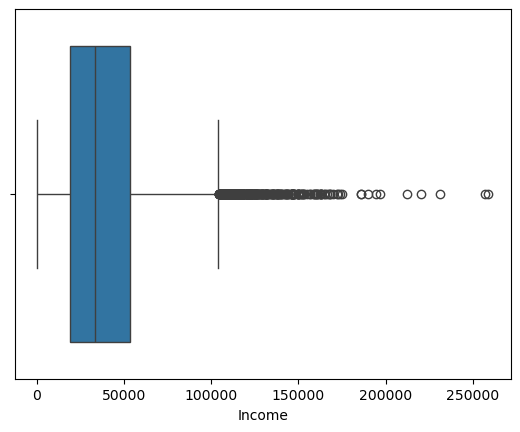

In [20]:
# Boxplot visualizations of continuous variables identified as datatype "float64"
sns.boxplot(x='Income',data=df_quant)

<Axes: xlabel='Outage_sec_perweek'>

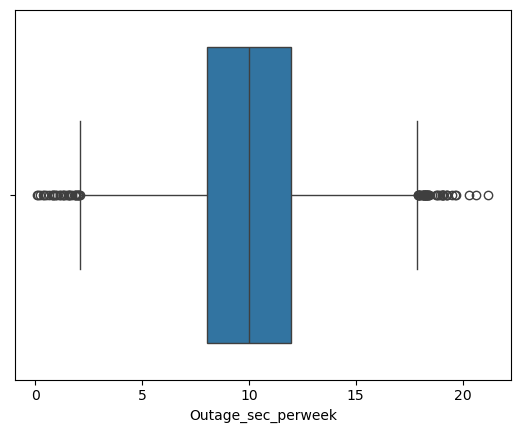

In [21]:
sns.boxplot(x='Outage_sec_perweek',data=df_quant)

<Axes: xlabel='Tenure'>

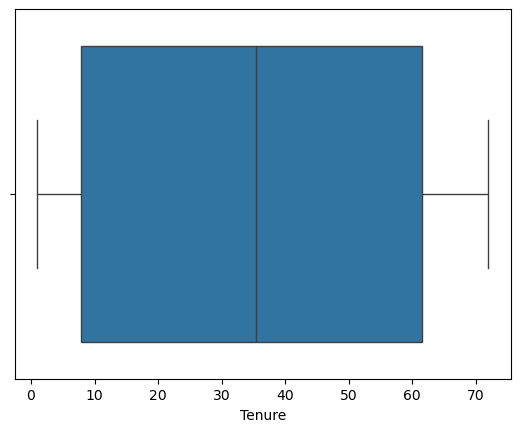

In [22]:
# Visualization of "Tenure”
sns.boxplot(x='Tenure',data=df_quant)

<Axes: xlabel='MonthlyCharge'>

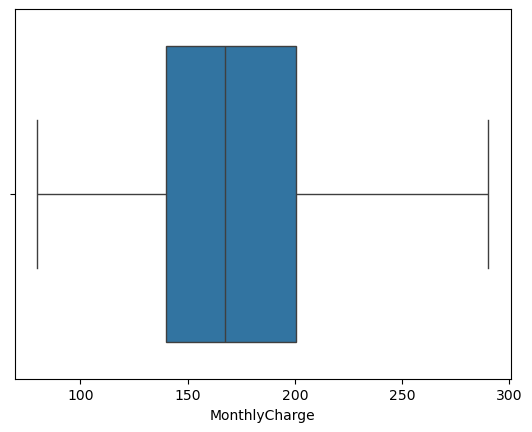

In [23]:
# Visualization of "MonthlyCharge”
sns.boxplot(x='MonthlyCharge',data=df_quant)

<Axes: xlabel='Bandwidth_GB_Year'>

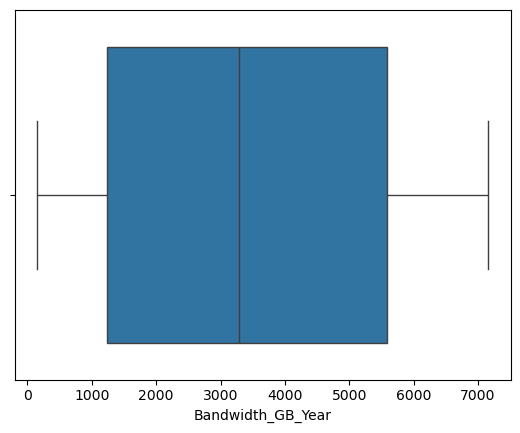

In [24]:
# Visualization of "Bandwidth_GB_Year”
sns.boxplot(x='Bandwidth_GB_Year',data=df_quant)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Based on the visualizations produced, we can see that there are some outliers in data set.  Looking at the summary statistics, we see there are **no overtly incorrect data** such as negative values.  When we look at the visualizations, we can see heavy skewing in some of the data.  While some have small pockets of data points at the tail ends.  This can be easily explained in certain variables such as 'Income', where most of the population falls under a certain income amount while a very small percentage of people have very high income.  'Tenure' is another great example of why a measure of central tendency does not accurately explain the data as seen in the visualization, this variable is bi-modal with peaks at opposite ends of the graph, which means customers are either very loyal and stay for very long periods of time or they leave very quickly.  Since these all data points are valid and imputing a measure of central tendency will add further weight to the skewed data, I have decided to **acknowledge the outliers but also to include them** in the data set instead of dropping or replacing them.

#### C3 Step 2 - Data Exploration
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In this section we will be exploring our data by first providing summary statistics for the variables we are interested in.  Some of the steps here will overlap previous ones and will be a repeat of the previous **.describe()** operation performed on **df_quant** which houses the **quantitative variables** we are working with.  We will also be creating a new variable called  **df_qual** to house all the **qualitative variables**, including the independent variable 'Churn', to perform a separate **.describe()**.  The reason why it is necessary to separate the quantitative and qualitative data is because the **.describe()** method can only perform one type of descriptive statistic function on any list of mixed variables and will not return both at once.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Afterwards, we will be creating visualizations to further explore our data and to get an idea of the distribution and trends.  For the **univariate** visualization, histograms will be deployed for the **quantitative variables**.The histogram creates "bins" over the range of the data and counts the frequency of data points that falls into each bin.  The histogram easily allows us to visualize the distribution shape of our data.  Meanwhile, both a **bar plot** and **countplot** will be used for the **qualitative variables**.  They are essentially the same, with both box plots and count plots counting the frequency of data points in our data set.  In the case of the variables chosen for this analysis, there are only 'Yes' and 'No' values to be counted.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For the **bivariate** visualization we will be iteratively plotting our independent variables against our dependent variable **Tenure** which is quantitative.  In order to visualize our quantitative independent variables against **Tenure** we will need a **quantitative vs quantitative** graph such as a **scatter plot**.  In a scatter plot each plot represents a separate data point.  This is useful to try and glean some insight into trends and for a rough check on multicollinearity.  We will employ a **for loop** that will iterate through the 11 **quantitative** variables against **Tenure** to generate 10 bivariate scatter plots.  To visualize the **qualitative** independent variables against **Tenure** we will need a **categorical vs quantitative** graph, thus we will be employing **density plots** which are a type of distribution plots available through seaborn.  According to the seaborn manual, the kernel density estimate (KDE) plot is similar to the histogram but produces a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.  To do so we will be storing our chosen variables for analysis under a new dataframe variable called **rfr_df** by merging **df_quant** and **df_qual**.  Again we will employ a **for loop** that will iterate through the dataframe categorical variables to generate a total of 4 bivariate density plots for the 4 categorical independent variables.

In [25]:
print(df_quant.describe())

          Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.

In [26]:
df_qual = clean_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']]
print(df_qual.head())
print(df_qual.describe())

  Churn Techie TechSupport PaperlessBilling
0    No     No          No              Yes
1   Yes    Yes          No              Yes
2    No    Yes          No              Yes
3    No    Yes          No              Yes
4   Yes     No         Yes               No
        Churn Techie TechSupport PaperlessBilling
count   10000  10000       10000            10000
unique      2      2           2                2
top        No     No          No              Yes
freq     7350   8321        6250             5882


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The summary statistics results from the **quantitative variables** show that each variable has a uniform 10,000 data point from the output **count**.  The **mean** and **standard deviation** can be easily seen represented by the **mean** and **std** output respectively.  Next, the summary statistics show us the **range** through the **min** and **max** output which represents the lowest and highest value within the data.  Lastly we have the **interquartile ranges** which are shown by the **25%**, **50%**, and **75%** output and also coincides with the boxes shown in box and whisker plots.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The **.describe()** method performed on our **qualitative variables** outputs a different type of summary statistic and also show that each variable has a uniform 10,000 data points from the output **count**.  The output **unique** shows that each of the qualitative variables only has two unique values, which we can see from running **.head()** to be the boolean value of **'Yes'** or **'No'**.  The next output is **top** which corresponds to the **mode** or most frequent value within each variable.  Lastly we have an output of **freq** which shows how frequently the **top** or **mode** value has been repeated within this data set.

##### **Univariate** Visualizations

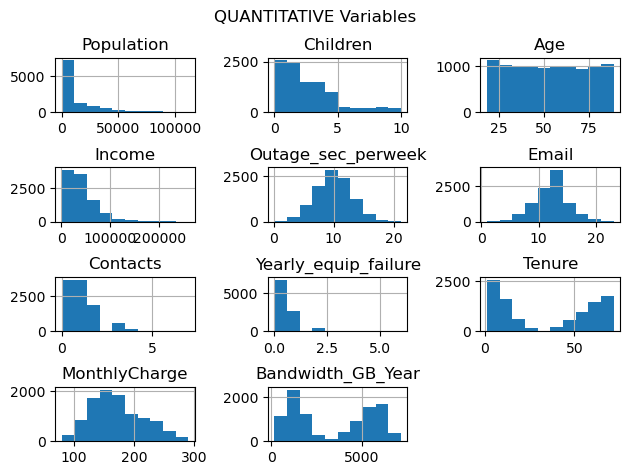

In [27]:
# Creating histograms of each quantitative variable
df_quant.hist()
plt.tight_layout()
plt.suptitle('QUANTITATIVE Variables')
plt.subplots_adjust(top=0.88)
plt.show()

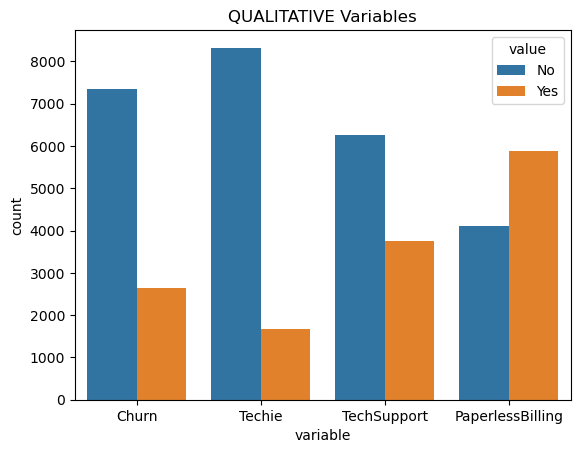

In [28]:
# Creating a seaborn countplot of all the 'Yes'/'No' counts in each variable
countplot = pd.melt(df_qual)
sns.countplot(x='variable', hue='value', data=countplot)
plt.title('QUALITATIVE Variables')
plt.show()

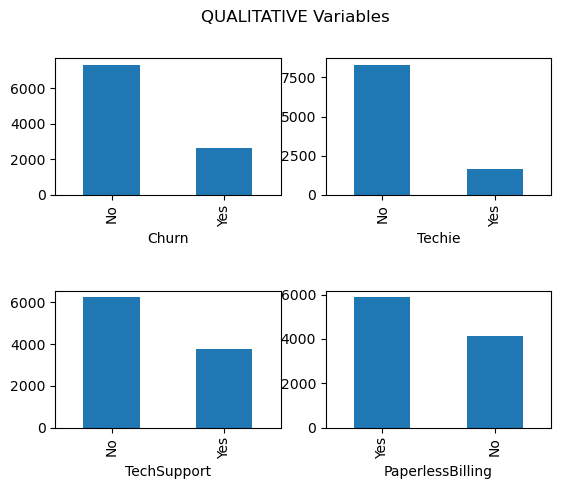

In [29]:
# Same univariate visualization but each variable in separate graphs
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('QUALITATIVE Variables')
df_qual['Churn'].value_counts().plot(ax=ax1, kind='bar')
df_qual['Techie'].value_counts().plot(ax=ax2, kind='bar')
df_qual['TechSupport'].value_counts().plot(ax=ax3, kind='bar')
df_qual['PaperlessBilling'].value_counts().plot(ax=ax4, kind='bar')
fig.subplots_adjust(hspace=0.7)
plt.show()

#### **Bivariate** visualizations for each independent variable with 'Tenure' as the dependent variable

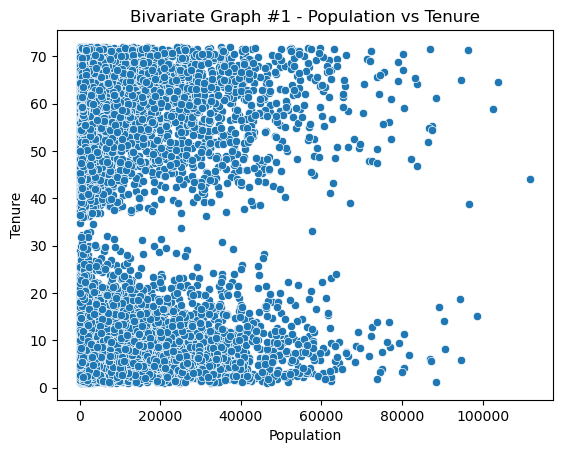

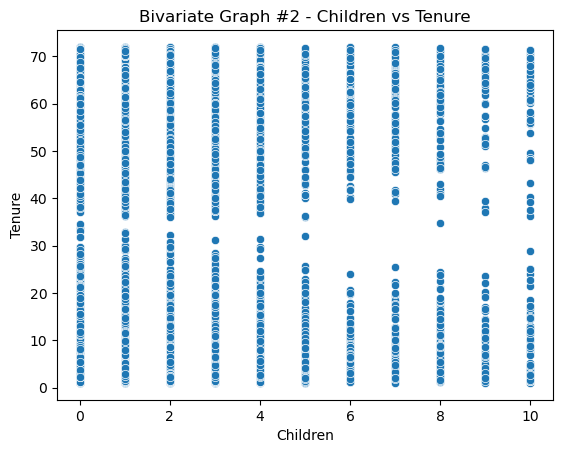

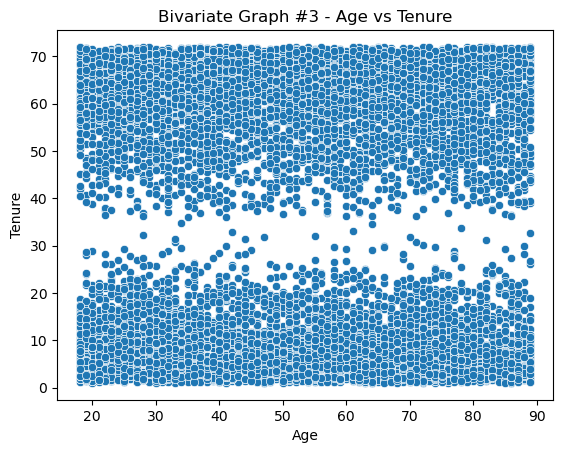

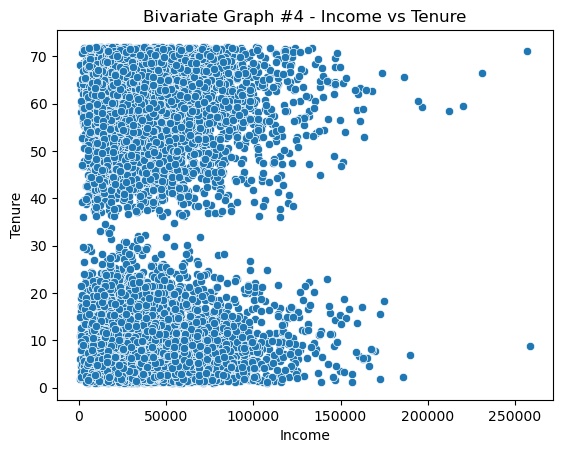

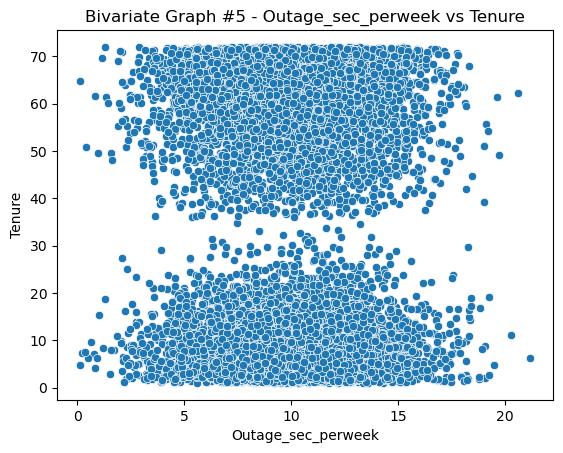

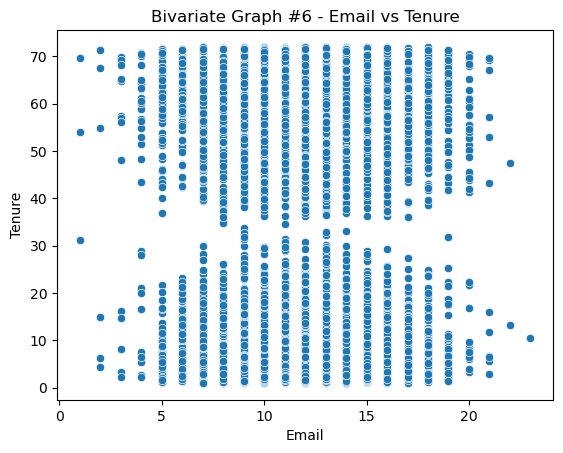

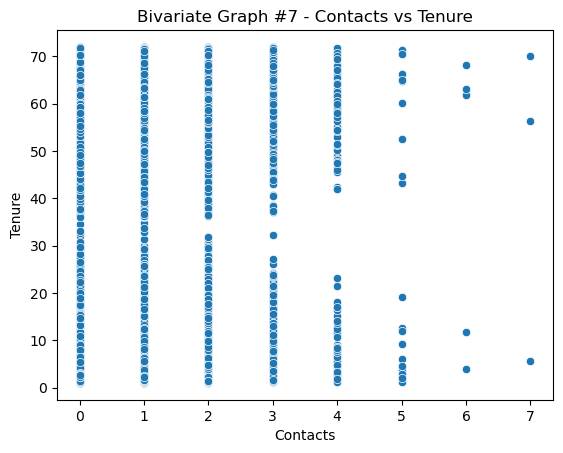

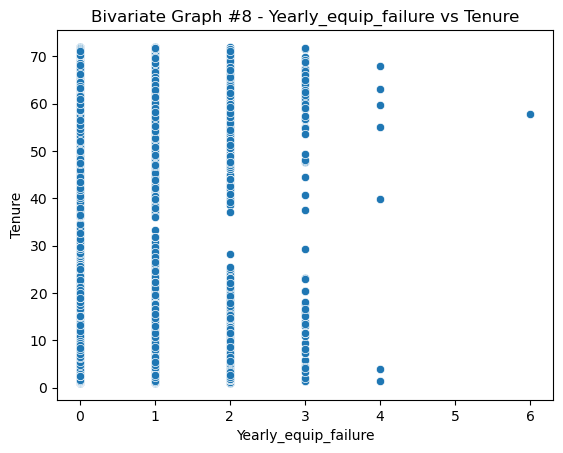

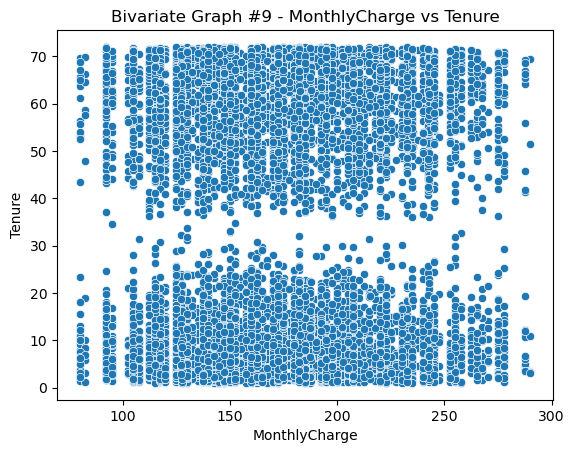

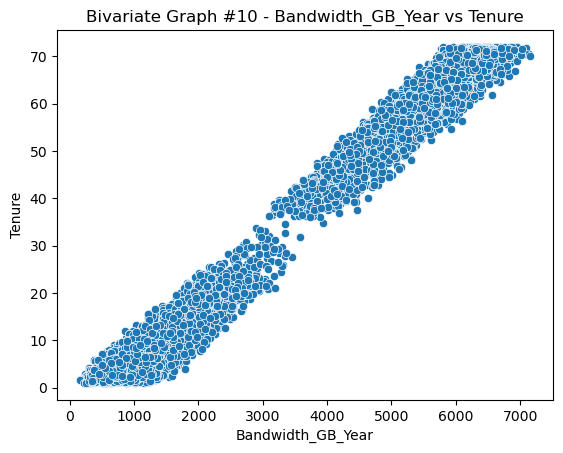

In [30]:
# Writing a FOR loop to iterate the plotting process over 10 independent quantitative variables
for i in range(len(df_quant.columns)):
    col = {0:'Population', 1:'Children', 2:'Age', 3:'Income', 4:'Outage_sec_perweek',
       5:'Email', 6:'Contacts', 7:'Yearly_equip_failure', 8:'Tenure',
       9:'MonthlyCharge', 10:'Bandwidth_GB_Year'}
    if i < 8:
        plt.figure()
        sns.scatterplot(x=df_quant.iloc[:,i],y='Tenure',data=df_quant)
        plt.title("Bivariate Graph #" + str(i+1) + " - " +col[i] + " vs Tenure")
        plt.show()
    elif  i > 8:
        plt.figure()
        sns.scatterplot(x=df_quant.iloc[:,i],y='Tenure',data=df_quant)
        plt.title("Bivariate Graph #" + str(i) + " - " +col[i] + " vs Tenure")
        plt.show()

In [31]:
# Merge both the QUANTITATIVE and QUALITATIVE data frames together
rfr_df = pd.concat([df_quant, df_qual], axis=1)
print(rfr_df.columns)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Churn', 'Techie', 'TechSupport',
       'PaperlessBilling'],
      dtype='object')


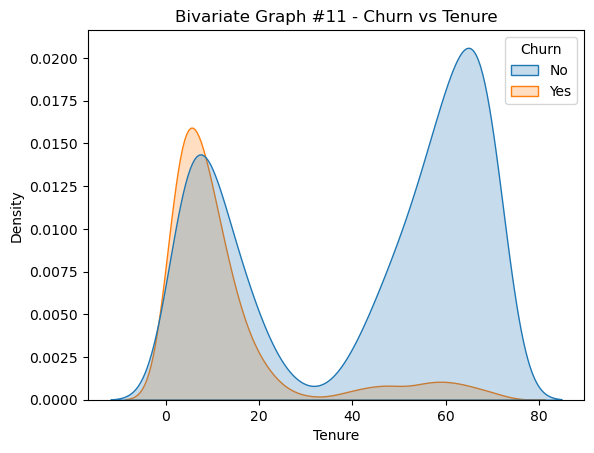

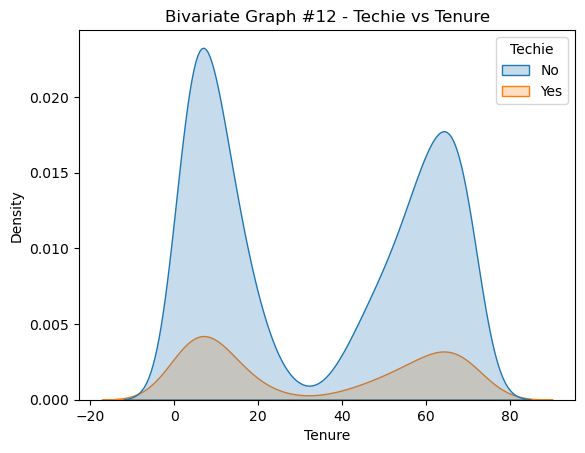

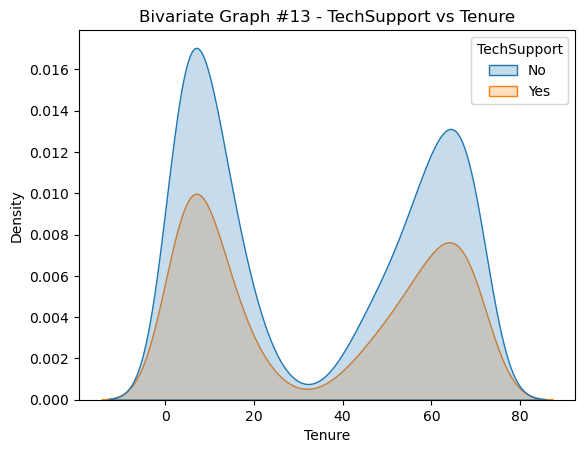

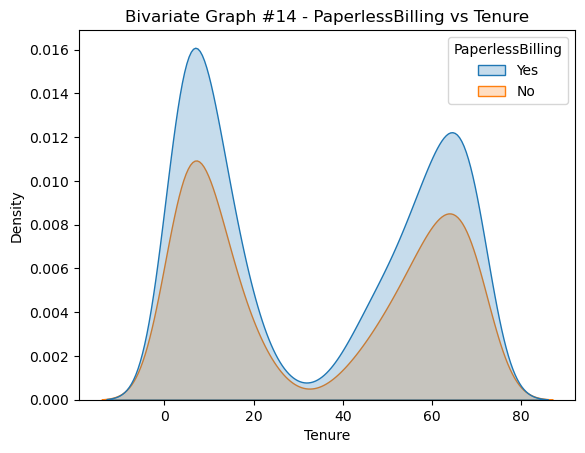

In [32]:
# Writing a FOR loop to iterate the plotting process over 4 independent categorical variables
for i in range (11, 15):
    col = {0:'Population', 1:'Children', 2:'Age', 3:'Income', 4:'Outage_sec_perweek',
       5:'Email', 6:'Contacts', 7:'Yearly_equip_failure', 8:'Tenure',
       9:'MonthlyCharge', 10:'Bandwidth_GB_Year', 11:'Churn', 12:'Techie',
       13:'TechSupport', 14:'PaperlessBilling'}
    plt.figure()
    sns.kdeplot(x='Tenure', hue=rfr_df.iloc[:,i], data=rfr_df, fill=True)
    plt.title("Bivariate Graph #" + str(i) + " - " +col[i] + " vs Tenure")
    plt.show()

#### C3 Step 3 - Data Wrangling
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One of the last steps for data pre-processing is **data wrangling**, the manipulation of our data so that it is in a workable format.  We had touched on a data wrangling issue earlier when manipulating the zip code data from datatype integer to a string with 5 digits.  To complete data wrangling we will mainly be looking at categorical variables and manipulating them before they are able to be used in modeling.  According to Dr. Middleton (2022) machine learning algorithms work exclusively with numeric data, which means that if your data contains categorical data  they must be re-expressed or encoded as numbers before they can be used.  There are may ways to do this with the tools available to us in Python.  One popular method is the creation of dummy variables through **get_dummies()** from the pandas package, which takes a categorical variable and creates as many dummy variables as there are unique values within this categorical variable while assigning a 0 or 1 to the dummy variables, with 0 indicating that the particular data point **does not** contain the value designated by the dummy variable while 1 indicates that the particular data point **does** contain the value corresponding to the dummy variable.  Dr. Middleton warns that using this method can add too many dimensions to the data if a variable has high cardinality, such as the variables 'City' or 'State'.  Using the **get_dummies()** on the variable 'State' will likely add 50 dummy variables that will make modeling much more complicated than needed.  Luckily, the data exploration process found that the categorical variables we are working with ('Churn', 'Techie', 'TechSupport', 'PaperlessBilling') are all Boolean in nature, containing only **Yes** and **No** values.  While we can use the **get_dummies()** method of wrangling our data, we can use **.replace()** or **.map()** to re-express the categorical variables, especially when they are Boolean.  We will be taking our categorical variables and re-expressing a **Yes** value with 1 while a **No** value will be replaced with 0 using both **.replace()** and **.map()** to demonstrate how both methods end with the same results of re-expression of categorical variables.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Lastly, now that the data set has been manipulated into a form that can be used by our model we can use a **heatmap** to show if there is any correlation within the data.

In [33]:
# Re-expression of categorical variables: 'Churn', 'Techie', 'TechSupport', 'PaperlessBilling'
# We will be using both .replace() and .map() to show both methods achieve same results
rfr_df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)
rfr_df['Techie'].replace(['Yes', 'No'], [1, 0], inplace=True)
rfr_df['TechSupport'] = rfr_df['TechSupport'].map({'Yes':1, 'No':0})
rfr_df['PaperlessBilling'] = rfr_df['PaperlessBilling'].map({'Yes':1, 'No':0})

In [34]:
print(rfr_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']].info())
print(rfr_df[['Churn', 'Techie', 'TechSupport', 'PaperlessBilling']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Churn             10000 non-null  int64
 1   Techie            10000 non-null  int64
 2   TechSupport       10000 non-null  int64
 3   PaperlessBilling  10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB
None
   Churn  Techie  TechSupport  PaperlessBilling
0      0       0            0                 1
1      1       1            0                 1
2      0       1            0                 1
3      0       1            0                 1
4      1       0            1                 0


In [35]:
# One last check on our cleaned dataframe containing all our model variables
print(rfr_df.info())
print(rfr_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  int64  
 6   Contacts              10000 non-null  int64  
 7   Yearly_equip_failure  10000 non-null  int64  
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
 11  Churn                 10000 non-null  int64  
 12  Techie                10000 non-null  int64  
 13  TechSupport           10000 non-null  int64  
 14  PaperlessBilling      10000 non-null  int64  
dtypes: float64(5), int64

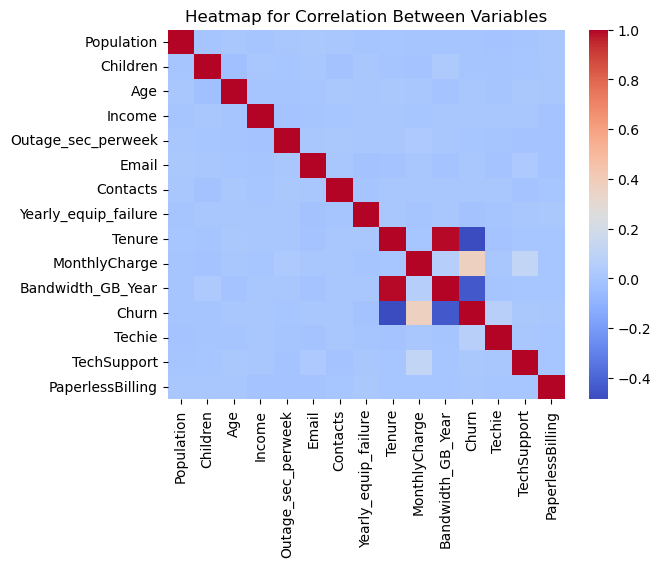

In [36]:
# Using heatmap to visualize correlation in quantitative data
sns.heatmap(rfr_df.corr(), cmap='coolwarm')
plt.title("Heatmap for Correlation Between Variables")
plt.show()

### C4 Cleaned Data Set
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our working data set has been cleaned and manipulated into a format that we can use in our random forest model.  At this point we will be exporting the data into a **.csv** file to preserve the changes we have done to the data.  We will be exporting **rfr_df** containing the entire cleaned data set into the file **D209_RFR_cleaned_Edward_Wu.csv**.

In [37]:
rfr_df.to_csv('D209_RFR_cleaned_Edward_Wu.csv', index=False)

## Part 4 Model Comparison and Analysis
### D1 Splitting the Data
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To ensure that our model predicts accurately, we will be performing hold-out validation by splitting the data using **train_test_split** into a training set and test set for each respective variable.  Dr. Elleh (n.d.) notes that the rule of thumb is to use a 80/20 split, which means 80% of the data will be used to train the model, and 20% of the data will be used to test the accuracy of the model.  We will also be using the **.shape** function, which Dr. Elleh suggests to confirm that the **split created equal proportions** of target variables in both sets of data.  Once this step is completed, we will be exporting the training set and test set as two separate .csv files for submission as part of the performance assessment requirements.

In [38]:
# Setting random state number for reproducibility
SEED = 47

In [39]:
# Splitting the data into independent and dependent variables
X = rfr_df.drop(['Tenure'], axis=1)
y = rfr_df['Tenure']

print('Printout of .shape: ', X.shape, y.shape)

Printout of .shape:  (10000, 14) (10000,)


In [40]:
# Split the data into training and test sets using the "X" and "y" variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print('Proportion of training set: ', X_train.shape, y_train.shape)
print('Proportion of testing set:  ', X_test.shape, y_test.shape)

Proportion of training set:  (8000, 14) (8000,)
Proportion of testing set:   (2000, 14) (2000,)


In [41]:
# Merging the 4-way split training sets and test sets back together into 2 frames
temp_train = [X_train, y_train]
rfr_train = pd.concat(temp_train, axis=1)

temp_test = [X_test, y_test]
rfr_test = pd.concat(temp_test, axis=1)

In [42]:
# Export both sets to .cvs files
rfr_train.to_csv('D209_RFR_train_EdwardWu.csv', index=False)
rfr_test.to_csv('D209_RFR_test_EdwardWu.csv', index=False)

### D2 Output and Intermediate Calculations
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  For this analysis, we will be creating an initial model and an improved model.  The idea of creating an initial model is not to create the perfect model but rather to throw something against the wall and see what sticks.  In the case of our Random Forest model, we can just instantiate the model with default parameters and call on the model using the training data to train the model, while using the testing data to test how well the predictions from the model will perform.  According to the scikit-learn manual (2024a), the **default parameters** are as follows: "n_estimators"=100, "max_features"=1.0, "max_depth"=None, "criterion"='squared_error'.  After fitting model to the default parameter and training data to the model, we can make predictions on the test set by creating **y_pred**.  We then measure the predictive performance of our model using mean squared error (**MSE**), and manually calculating the root mean squared error (**RMSE**).  Dr. Elleh (n.d.) also suggests providing the R-squared score as another metric for model accuracy.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; After we complete the above steps, we will then move on to create an improved model by performing hyper-parametric tuning, which gives the model specific hyper-parameters with which it will use to train the algorithm.  While it is possible to iteratively go through the process of manually changing the parameters one by one, we can save time by using a function to do so, using **GridSearchCV**  from **scikit-learn**, which is a brute force method that iteratively searches over a range of values we provide in the form of a dictionary to find which combination of parameters provides the highest accuracy.  We will provide a grid of parameters with arbitrarily chosen ranges to shorten the processing time for the sake of this performance assessment.  Once the best performing parameters are found, we input them into the model and re-run the same steps of generating predictions and then creating model performance metrics to evaluate the differences in the two models.  One final step Dr. Elleh (n.d.) suggests is to provide a graph showing which feature was most predictive for the model.

### D3 Code Execution
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The following lines of codes will execute the steps listed above and output the model performance metric at each step.

#### INITIAL MODEL

In [43]:
# Create an INITIAL model
rfr = RandomForestRegressor(random_state=SEED)
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 47,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Fitting the data to training set and predicting y on testing set
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [45]:
# Calculating the accuracy metrics
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)
r2 = r2_score(y_test, y_pred)
print('Initial Model MSE Score:       {:.6f}'.format(mse))
print('Initial Model RMSE Score:      {:.6f}'.format(rmse))
print('Initial Model R-squared Score: {:.6f}'.format(r2))

Initial Model MSE Score:       6.092106
Initial Model RMSE Score:      2.468219
Initial Model R-squared Score: 0.991324


#### TUNED MODEL

In [46]:
# Using GridSearchCV for hyper-parameter tuning
rfr = RandomForestRegressor(random_state=SEED)
params_rfr = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': [0.10, 0.50, 1.0, 2],
    'max_depth': [8, 16, 32, None]
}
rfr_tuned = GridSearchCV(estimator=rfr,
                         param_grid=params_rfr,
                         cv=10,
                         scoring='neg_mean_squared_error', # criterion in original random forest was MSE so this will be the scoring here
                         n_jobs=-1)
rfr_tuned.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=47), n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32, None],
                         'max_features': [0.1, 0.5, 1.0, 2],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='neg_mean_squared_error')

In [47]:
# Printout of the best performing parameters
print(rfr_tuned.best_params_)

{'max_depth': 16, 'max_features': 1.0, 'n_estimators': 150}


In [51]:
# Predicting on test set and calculate accuracy metrics
y_pred_2 = rfr_tuned.predict(X_test)
mse_2 = MSE(y_test, y_pred_2)
rmse_2 = mse_2**(1/2)
r2_2 = r2_score(y_test, y_pred_2)
print('Tuned Model MSE Score:       {:.6f}'.format(mse_2))
print('Tuned Model RMSE Score:      {:.6f}'.format(rmse_2))
print('Tuned Model R-squared Score: {:.6f}'.format(r2_2))

Tuned Model MSE Score:       6.092718
Tuned Model RMSE Score:      2.468343
Tuned Model R-squared Score: 0.991323


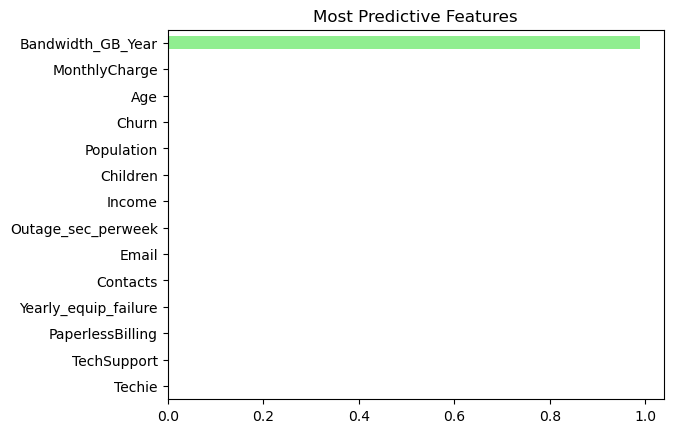

In [52]:
# Creating a barplot to show which features were most predictive according to the model
# Dr. Elleh's (n.d.) code from powerpoint
importances = pd.Series(data=rfr_tuned.best_estimator_.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Most Predictive Features')
plt.show()

## Part 5 Data Summary and Implications
### E1 Accuracy and MSE
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now that we have our tuned model, we look at some of the evaluation metrics used to assess our model.  For this particular analysis, we will be looking at three metrics, the **mean squared error** (MSE), **root mean squared error** (RMSE), and the **R-squared** (R2) also known as the coefficient of determination.  We will be repeating a final printout of all these metrics pulled from the above code for easier viewing.

In [53]:
print('Initial Model MSE Score:       {:.6f}'.format(mse))
print('Initial Model RMSE Score:      {:.6f}'.format(rmse))
print('Initial Model R-squared Score: {:.6f}'.format(r2))
print('Tuned Model MSE Score:       {:.6f}'.format(mse_2))
print('Tuned Model RMSE Score:      {:.6f}'.format(rmse_2))
print('Tuned Model R-squared Score: {:.6f}'.format(r2_2))
print('Differences in MSE Scores:       {:.6f}'.format(mse_2 - mse))
print('Differences in RMSE Scores:      {:.6f}'.format(rmse_2 - rmse))
print('Differences in R-squared Scores: {:.6f}'.format(r2_2 - r2))

Initial Model MSE Score:       6.092106
Initial Model RMSE Score:      2.468219
Initial Model R-squared Score: 0.991324
Tuned Model MSE Score:       6.092718
Tuned Model RMSE Score:      2.468343
Tuned Model R-squared Score: 0.991323
Differences in MSE Scores:       0.000612
Differences in RMSE Scores:      0.000124
Differences in R-squared Scores: -0.000001


Dr. Elleh explains that MSE is the sum of sqaures differences between the predicted values and the actual values and determines how good the estimate is based on the algorithm analysis, which is why MSE is used as an accuracy measure.  In fact, MSE is what the base decision tree regressor uses to split a node as indicated earlier by the default parameters where 'criterion'='squared_error', which is also corroborated by the scikit-learn manual (2024).  A lower MSE value indicates a better fit of model.  The **initial model** produced a **MSE score of 6.092106** while the **tuned model** produced a **MSE score of 6.092718**.  The related RMSE score is the square root of the MSE score and is used to measure the average difference between values predicted by a model and the values actually observed.  Because the scale is more similar to the dependent variable the RMSE is sometimes easier to interpret, and similarly to MSE a lower RMSE value is considered a better fit of th model.  The **initial model** produced a **RMSE score of 2.468219** while the **tuned model** produced a **RMSE score of 2.468646**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The last metric used is R-squared, which Dr. Elleh (n.d.) explains is the percent variation in dependent variable that is explained by the independent variable.  It is a number ranging between 0 and 1, with an R-squared value of 1 representing a 100% explanation of variation in the dependent variable due to independent variable.  Likewise, an R-squared value of 0 represents a 0% explanation of variation in the dependent variable due to the independent variables.  Dr. Elleh (n.d.) posits that while a higher R-square is preferred to show better model accuracy, an R-squared between 0.50 to 0.99 is deemed acceptable.  The **initial model** produced a **R-squared score of 0.991324** while the **tuned model** produced a **R-squared score of 0.991323**.

### E2 Results and Implications
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The results of our analysis showcases how powerful the Random Forest Regression model is, with even the default parameters in the initial model out-performing our tuned model even though our parameters for tuning included the initial default values.  This indicates that the Random Forest Regression model analysis was an effective choice of model selection and was a success in producing a model showing statistical significance.  Before we break out any celebratory champagne bottles though, it is important to note that having an almost perfect model (right out the box no less) may not be a good thing because it could also indicate that the model is overfit to the data despite the fact that Random Forest is an ensemble learning model which inherently has lower variance and bias issues when compared to single decision tree models.  Having an overfit model means that it may test very well on our current data set but may not perform so well on new data such as future customers.  The differences in accuracy scores between the initial and tuned model shown in the above code are miniscule for each of the metrics.  Even though the tuned model has very slightly lower accuracy than the initial model, the cross validation method of tuning the model ensures that there will be even less overfitting in the tuned model than the initial model.  For these reasons, we may consider the tuned model a better predictive model than the initial model despite the slightly lower accuracies.

### E3 Limitation
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One of the limitations of our analysis is regarding the data and feature selection.  We did not cast a wide enough net at the beginning during the variable selection process, we chose a few from a list of 50 total variables and reduced it down to 14 independent variables.  If we had started with the entire list variables, it is possible that we could have captured more trends within the data and ended up with a different model.  Even though random forest regression is not particularly sensitive to multicollinearity, we can see from our above EDA steps (in Part C3) with the scatter plot and our later findings from the heatmap that there was a very strong correlation between our dependent variable 'Tenure' and the independent variable 'Bandwidth_GB_year'.  This point once again resurfaces when we produced a graph of feature importances (in Part D2) which highlights 'Bandwidth_GB_year' as the most predictive feature.  Another limitation of the data is with the nature of some of our data itself which includes surveyed responses and may be biased in nature.  Data that is self-reported such as the **Techie** variable we used or any of the other survey data included in this data set run the risk of having bias due to self-report since customers are providing their own subjective input.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One limitation of the actual analysis model creation portion of this project is how we used **GridSearchCV** to find the best parameters for our model.  We limited the range for the parameters in the grid search, but it is possible that a wider range will produce a better model.  This limitation was set in place for practicality of our performance assessment, so that we can perform our parameter search without wasting too much time.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One last limitation of our analysis is a fundamental pitfall of statistics, the often repeated mantra of statistics is that correlation is not causation, our findings may have found correlation but we can not say definitively that these variables are only reason why a change occurs in our dependent variable for the reasons listed above.

### E4 Course of Action
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We have established that our analysis contains statistical significance for answering our research question, allowing us to infer customer behavior going forward and also to provide recommendations for the business.  Despite the limitations listed above, we can fairly accurately predict how long a customer's tenure within the company will be based on the model we created.  We have also identified the bandwidth usage as one of th emost predictive variable for length of tenure.  Because of this, we can recommend the company to create some type of incentives packages based on how much bandwidth they use.  While a company cannot force a customer to use more internet due to it being a personal choice, the company can design programs to make internet access easier for the customer such as providing better technical support for people who are inexperienced with using the internet, or providing video lessons for older customers to encourage them to learn how to better utilize the internet.  Because the bandwidth usage was a much more important feature for prediction compared to even the monthly charges, the company can also look into creating more tiers of higher priced packages that have much better speeds to incentivize more bandwidth usage and thus increase length of tenure.  Because there are other potential variables that may be linked to total amount of bandwidth usage such as the speed of internet services or total amount of down time, I would also suggest the company perform further analysis on this topic.

### F1 Panopto Demonstration
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To satisfy the requirements for this task, a Panopto video was recorded to demonstrate my competency with the coursework.  The Panopto video will include the following elements as part of the requirements:

>an identification of the version of the programming environment

>a comparison of the initial Random Forest model and the tuned model

This Panopto video URL is provided below:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c0e64d8b-3357-4ee3-a36b-b24d000f298d

### G1 Sources of Third-Party Code
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For this assessment the data set used was provided on the WGU D209 performance assessment webpage.  The code written for this assignment was developed by using my own knowledge and experience with Python from previous Coursera courses I have taken along with instructions from the D209 coursework including the WGU website, Dr. Festus Elleh's Panopto webinar videos, and the DataCamp (datacamp.com) website.  Cited below is also the scikit-learn, matplotlib, and seaborn websites which are manuals for the Python packages and were used to fine tune certain methods with parameters within the code.  Lastly a few lines from StackOverflow were implemented to help with the data cleaning and visualization process.  Otherwise, no other third-party code was used to support this application.

<div style="page-break-after: always;"></div>

## Part 6 References
### H1 Sources
*Python - loading zip codes into a dataframe as strings?*. Stack Overflow. (2015). https://stackoverflow.com/questions/33137686/python-loading-zip-codes-into-a-dataframe-as-strings 

*Creating multiple subplots using plt.subplots#*. Matplotlib 3.8.4 documentation. (n.d.). https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 

Waskom, M. L. (n.d.). *Visualizing distributions of data#*. Visualizing distributions of data - seaborn 0.13.2 documentation. https://seaborn.pydata.org/tutorial/distributions.html 

*Countplot from several columns*. Stack Overflow. (n.d.). https://stackoverflow.com/questions/51211538/countplot-from-several-columns

*Use a loop to plot N charts python*. Stack Overflow. (n.d.-b). https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python 

Kawerk, E. (n.d.). *Machine Learning with Tree-Based Models in Python*. DataCamp. https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python

Elleh, F. (n.d. -a). *D209 Task 1: Expectations and Data Preprocessing - Python*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7329050b-3de4-412a-9ff4-b0790009d02b

Elleh, F. (n.d. -b). *D209 T2 Building RF in R Churn Data*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=73d810af-b7f7-4ac6-ac4e-b11b00f4384a

Elleh, F. (n.d. -c). *D209 Webinar Splitting Data and Creating Model*. Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=77e354f7-ed96-4886-9a44-b07a00d44a31

Elleh, F. (n.d. -d). *Task 2: PREDICTIVE ANALYSIS Decision Trees, Random Forests, Advanced Regression (lasso or ridge)*. WGU Student Portal - Data Mining I D209. https://srm--c.vf.force.com/sfc/servlet.shepherd/version/download/068S6000009nESr?asPdf=false

scikit-learn developers (2024). *RandomForestRegressor*. scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Middleton, K. (2022a). D208 - Webinar: Getting Started with D208 Part I (November 2022). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970 

<div style="page-break-after: always;"></div>

### I1 Professional Communication
I believe that I have demonstrated very clear and professional communication in the content and presentation of my submission.